<a href="https://colab.research.google.com/github/VicKhm/ML/blob/main/phophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet

In [ ]:
df = pd.read_csv('prophet_data.csv')

In [ ]:
df

,ds,y,type_client
0,2021-08-02,1739.500000,fashion
1,2021-08-02,604.500000,food
2,2021-08-03,1929.483333,fashion
3,2021-08-03,659.250000,food
4,2021-08-04,2859.433333,fashion
...,...,...,...
981,2022-12-05,7676.050000,food
982,2022-12-06,2600.833333,fashion
983,2022-12-06,8125.383333,food
984,2022-12-07,2445.950000,fashion


(array([ 7., 28., 28., 21., 14., 20., 36., 35., 39., 24., 29., 19., 17.,
        13.,  9., 11.,  8.,  5.,  2.,  2.,  4.,  1.,  1.,  5.,  0.,  1.,
         1.,  0.,  2.,  2.,  3.,  2.,  4.,  8.,  7.,  6.,  6.,  6., 11.,
         6.,  8.,  9., 10.,  8.,  4.,  3.,  5.,  1.,  1.,  1.]),
 array([ 1601.05      ,  2009.25566667,  2417.46133333,  2825.667     ,
         3233.87266667,  3642.07833333,  4050.284     ,  4458.48966667,
         4866.69533333,  5274.901     ,  5683.10666667,  6091.31233333,
         6499.518     ,  6907.72366667,  7315.92933333,  7724.135     ,
         8132.34066667,  8540.54633333,  8948.752     ,  9356.95766667,
         9765.16333333, 10173.369     , 10581.57466667, 10989.78033333,
        11397.986     , 11806.19166667, 12214.39733333, 12622.603     ,
        13030.80866667, 13439.01433333, 13847.22      , 14255.42566667,
        14663.63133333, 15071.837     , 15480.04266667, 15888.24833333,
        16296.454     , 16704.65966667, 17112.86533333, 17521.071   

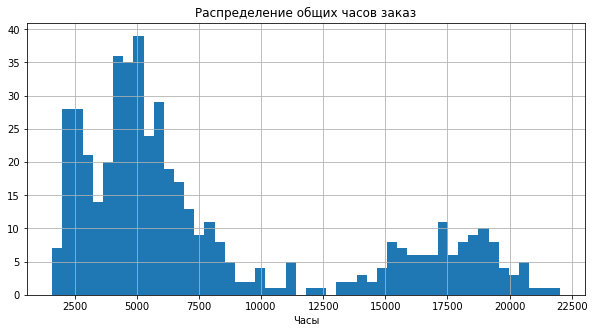

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Распределение общих часов заказ')
plt.xlabel('Часы')
plt.grid()

plt.hist(df.groupby('ds')['y'].sum(), bins = 50)

Данные по дням в разбивке по заказу часов

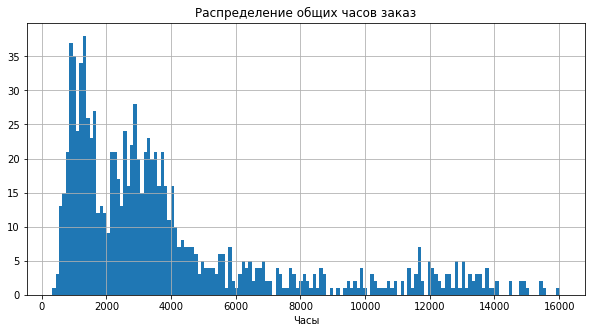

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Распределение общих часов заказ')
plt.xlabel('Часы')
plt.grid()

plt.hist(df['y'], bins = 150)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


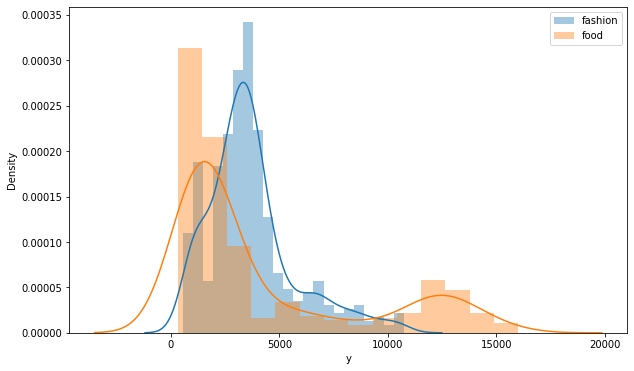

In [ ]:
#для фуд не фуд отдельные
plt.figure(figsize=(10, 6))

foodn = pd.unique(df['type_client'])

for t in foodn:
  sns.distplot(df.loc[df['type_client']== t]['y'], label = t);
plt.legend();

Более менее нормальные со смещением влево 

In [ ]:
import matplotlib.dates as mdates
plt.figure(figsize=(19,12))
plt.title('Общая динамика заказа')
plt.xlabel('Дата')
plt.grid()

locator = mdates.MonthLocator()
X = plt.gca().xaxis
X.set_major_locator(locator)
sns.lineplot(x = df.groupby('ds')['y'].sum().index,
             y = df.groupby('ds')['y'].sum())
plt.show()

NameError: ignored

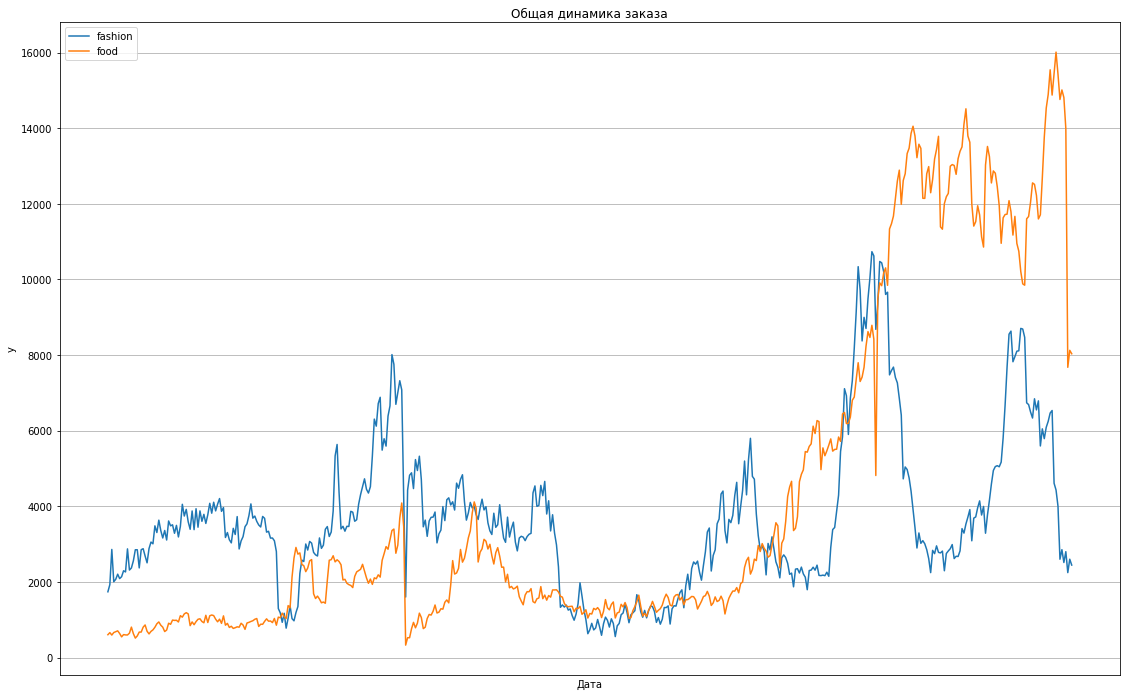

In [ ]:
import matplotlib.dates as mdates
plt.figure(figsize=(19,12))
plt.title('Общая динамика заказа')
plt.xlabel('Дата')
plt.grid()
for t in pd.unique(df['type_client']):
  sns.lineplot(x = df.loc[df['type_client']== t]['ds'],
               y = df.loc[df['type_client']== t]['y'],
               label = t);
  

locator = mdates.MonthLocator()
X = plt.gca().xaxis
X.set_major_locator(locator)

plt.show()

In [ ]:
train = df.loc[df['ds']< '2022-11-07']
test = df.loc[df['ds']>='2022-11-07']

In [ ]:
train.shape

(924, 3)

In [ ]:
#prophet


In [ ]:
model = Prophet()

In [ ]:
model = Prophet()
model.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xlurro7/v4g0tnw5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xlurro7/js7dw2ul.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82256', 'data', 'file=/tmp/tmp2xlurro7/v4g0tnw5.json', 'init=/tmp/tmp2xlurro7/js7dw2ul.json', 'output', 'file=/tmp/tmp2xlurro7/prophet_modelh5vqq2es/prophet_model-20221209132207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


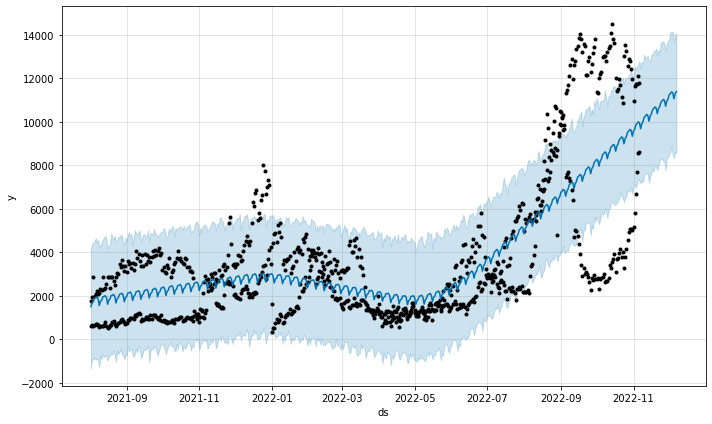

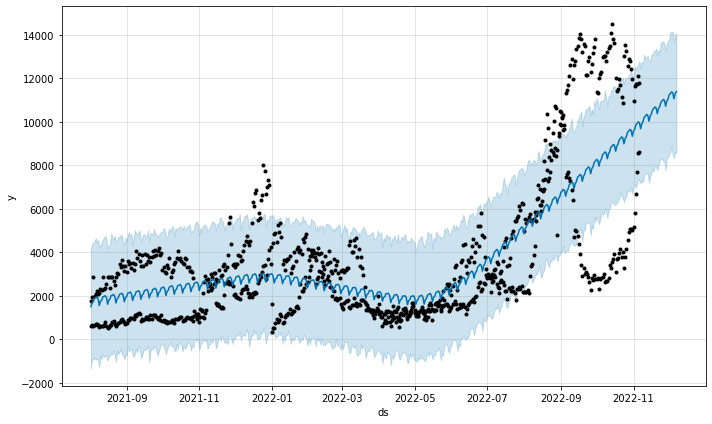

In [ ]:
future = model.make_future_dataframe(periods = 31)
forecast = model.predict(future)

model.plot(forecast)


In [ ]:
train_1 = train.loc[train['type_client'] == 'food',['ds','y']]
train_2 = train.loc[train['type_client'] == 'fashion', ['ds','y']]

test_1 = test.loc[test['type_client'] == 'food', ['ds','y']]
test_2 = test.loc[test['type_client'] == 'fashion', ['ds','y']]

In [ ]:
m_1 = Prophet()
m_1.fit(train_1)

m_2 = Prophet()
m_2.fit(train_2)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xlurro7/le676ne4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xlurro7/fo9bcgu2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76059', 'data', 'file=/tmp/tmp2xlurro7/le676ne4.json', 'init=/tmp/tmp2xlurro7/fo9bcgu2.json', 'output', 'file=/tmp/tmp2xlurro7/prophet_model64j44w7g/prophet_model-20221209132219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality

In [ ]:
future = m_1.make_future_dataframe(periods = 31)

In [ ]:
forecast_1 = m_1.predict(future)
forecast_2 = m_2.predict(future)

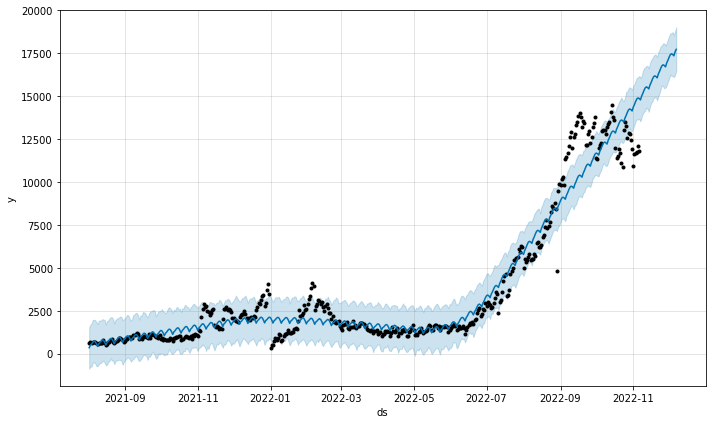

In [ ]:
m_1.plot(forecast_1);


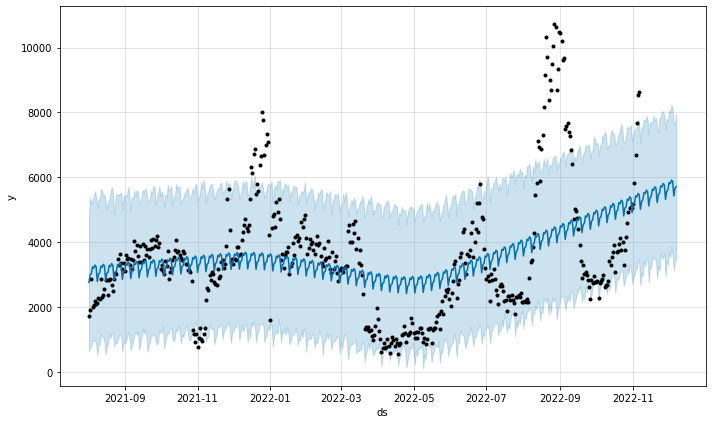

In [ ]:
m_2.plot(forecast_2);

In [ ]:
from sklearn.metrics import mean_absolute_error
error_forecast_1 = mean_absolute_error(forecast_1['yhat'].tail(31), test_1['y'])
error_forecast_2 = mean_absolute_error(forecast_2['yhat'].tail(31), test_2['y'])

In [ ]:
 error_forecast_1

3906.4101244735425

In [ ]:
error_forecast_2

1845.4811147136584

In [ ]:
#в процентах
modul_dif_1 = np.abs(forecast_1.tail(31).reset_index()['yhat']- test_1.reset_index()['y'])
dif_percent_1 = np.mean(modul_dif_1/test_1.reset_index()['y'])*100

modul_dif_2 = np.abs(forecast_2.tail(31).reset_index()['yhat']- test_2.reset_index()['y'])
dif_percent_2 = np.mean(modul_dif_2/test_2.reset_index()['y'])*100

In [ ]:
dif_percent_1, dif_percent_2

(36.525993028226964, 44.10441104824127)

In [ ]:
#model_2
holidays = pd.DataFrame({'holiday': 'holiday', 'ds': pd.to_datetime(['2022/02/24','2022/02/25','2022/02/26',
                                                                  '2022/02/27','2022/02/28','2022/03/01',
                                                                  '2022/03/02', '2022/03/03', '2022/03/04',
                                                                  '2022/03/05', '2022/03/06', '2022/03/07', 
                                                                  '2022/03/10', '2022/03/11', '2022/03/12',
                                                                  '2022/09/01', '2022/09/02', '2022/03/12',
                                                                   '2022/09/10',  '2022/09/11',  '2022/10/29'])
})

In [ ]:
holidays

,holiday,ds
0,holiday,2022-02-24
1,holiday,2022-02-25
2,holiday,2022-02-26
3,holiday,2022-02-27
4,holiday,2022-02-28
5,holiday,2022-03-01
6,holiday,2022-03-02
7,holiday,2022-03-03
8,holiday,2022-03-04
9,holiday,2022-03-05


In [ ]:
m_1 = Prophet(interval_width= 0.90, growth = 'linear', weekly_seasonality = True,  yearly_seasonality=True, seasonality_mode = 'additive', 
              holidays = holidays)
m_1.add_country_holidays(country_name = 'Russia')
m_1.fit(train_1)

m_2 = Prophet( weekly_seasonality = True,  yearly_seasonality=True, seasonality_mode = 'multiplicative', 
              holidays = holidays)
m_2.add_country_holidays(country_name = 'Russia')
m_2.fit(train_2)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xlurro7/jwyui0mp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xlurro7/23cb_z7z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70028', 'data', 'file=/tmp/tmp2xlurro7/jwyui0mp.json', 'init=/tmp/tmp2xlurro7/23cb_z7z.json', 'output', 'file=/tmp/tmp2xlurro7/prophet_modelo_892k_l/prophet_model-20221209132250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xl

In [ ]:
forecast_1 = m_1.predict(future)
forecast_2 = m_2.predict(future)

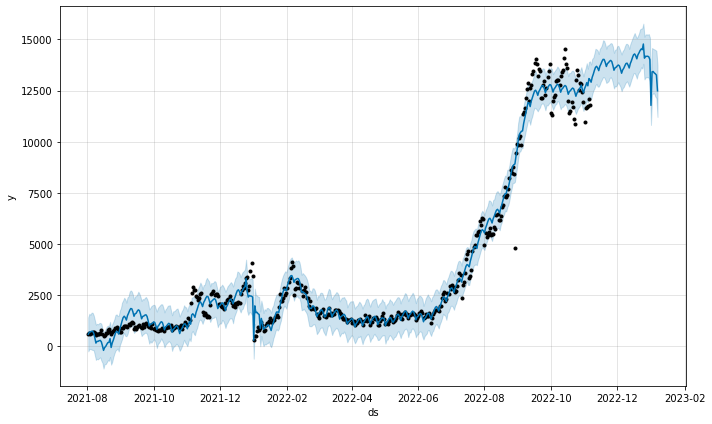

In [ ]:
m_1.plot(forecast_1);

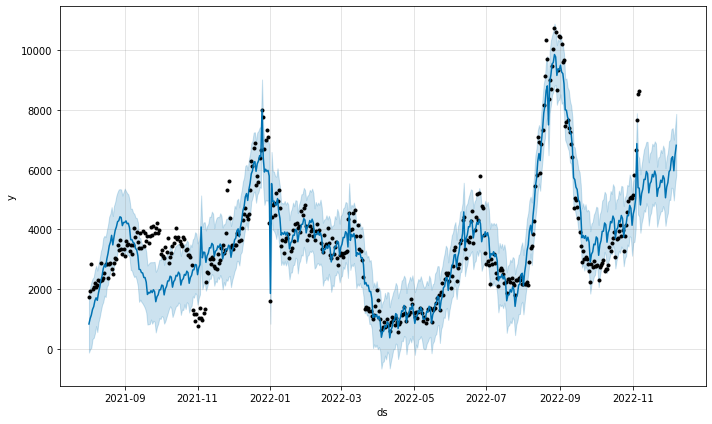

In [ ]:
m_2.plot(forecast_2);

In [ ]:
error_forecast_1 = mean_absolute_error(forecast_1['yhat'].tail(31), test_1['y'])
error_forecast_2 = mean_absolute_error(forecast_2['yhat'].tail(31), test_2['y'])

In [ ]:
error_forecast_1, error_forecast_2

(2129.882774642899, 1908.2676179032778)

In [ ]:
modul_dif_1 = np.abs(forecast_1.tail(31).reset_index()['yhat']- test_1.reset_index()['y'])
dif_percent_1 = np.mean(modul_dif_1/test_1.reset_index()['y'])*100

modul_dif_2 = np.abs(forecast_2.tail(31).reset_index()['yhat']- test_2.reset_index()['y'])
dif_percent_2 = np.mean(modul_dif_2/test_2.reset_index()['y'])*100

In [ ]:
dif_percent_1, dif_percent_2

(20.019423066550875, 48.04476994098405)

,ds,y,type_client
0,2021-08-02,1739.500000,fashion
1,2021-08-02,604.500000,food
2,2021-08-03,1929.483333,fashion
3,2021-08-03,659.250000,food
4,2021-08-04,2859.433333,fashion
...,...,...,...
981,2022-12-05,7676.050000,food
982,2022-12-06,2600.833333,fashion
983,2022-12-06,8125.383333,food
984,2022-12-07,2445.950000,fashion


In [ ]:
#last
train_1_final = df.loc[df['type_client'] == 'food',['ds','y']]
train_2_final = df.loc[df['type_client'] == 'fashion',['ds','y']]

In [ ]:
m_1 = Prophet(interval_width= 0.90, growth = 'linear', weekly_seasonality = True,  yearly_seasonality=True, seasonality_mode = 'additive', 
              holidays = holidays)
m_1.add_country_holidays(country_name = 'Russia')
m_1.fit(train_1_final)

m_2 = Prophet( weekly_seasonality = True, yearly_seasonality=True, seasonality_mode = 'multiplicative', 
              holidays = holidays)
m_2.add_country_holidays(country_name = 'Russia')
m_2.fit(train_2_final)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xlurro7/8v4gb6w6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xlurro7/d3jrc_h8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95034', 'data', 'file=/tmp/tmp2xlurro7/8v4gb6w6.json', 'init=/tmp/tmp2xlurro7/d3jrc_h8.json', 'output', 'file=/tmp/tmp2xlurro7/prophet_modelcak4ii_8/prophet_model-20221209132324.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:23:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:23:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xl

In [ ]:
future = m_1.make_future_dataframe(periods = 31)
forecast_1 = m_1.predict(future)
forecast_2 = m_2.predict(future)

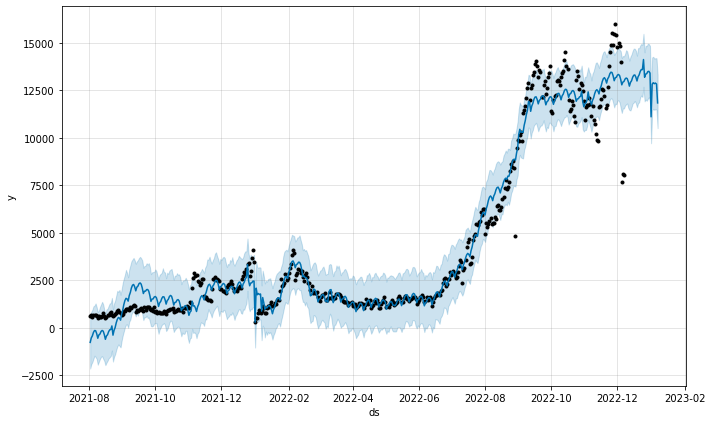

In [ ]:
m_1.plot(forecast_1);

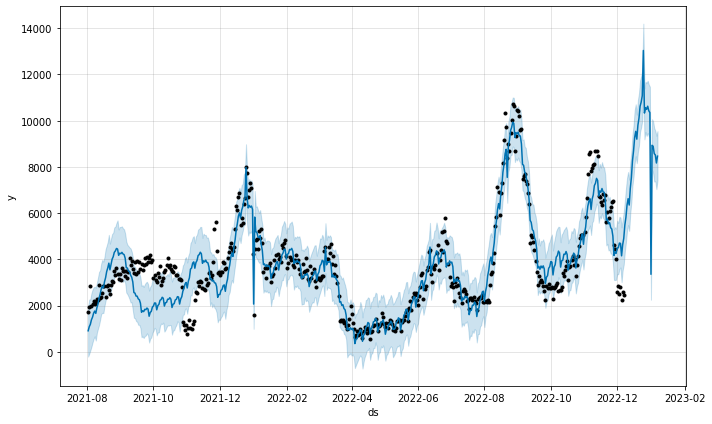

In [ ]:
m_2.plot(forecast_2);

In [ ]:
forecast_1[forecast_1['ds']> '2022-12-24'] 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Defender of the Fatherland Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
510,2022-12-25,11251.980785,12693.972950,15478.878892,11199.130186,11306.711179,686.963733,686.963733,686.963733,0.0,...,-22.324740,-22.324740,-22.324740,2208.485801,2208.485801,2208.485801,0.0,0.0,0.0,14125.105578
511,2022-12-26,11281.969964,11921.103451,14503.494270,11221.749272,11340.828403,0.000000,0.000000,0.000000,0.0,...,-269.540534,-269.540534,-269.540534,2179.005329,2179.005329,2179.005329,0.0,0.0,0.0,13191.434759
512,2022-12-27,11311.959143,12019.594824,14851.505007,11244.351825,11375.037463,0.000000,0.000000,0.000000,0.0,...,-94.707063,-94.707063,-94.707063,2136.808396,2136.808396,2136.808396,0.0,0.0,0.0,13354.060477
513,2022-12-28,11341.948322,11953.748483,14829.763221,11270.777575,11411.397893,0.000000,0.000000,0.000000,0.0,...,-37.842614,-37.842614,-37.842614,2081.213294,2081.213294,2081.213294,0.0,0.0,0.0,13385.319003
514,2022-12-29,11371.937501,12061.979796,14959.568536,11293.580335,11446.801959,0.000000,0.000000,0.000000,0.0,...,106.498706,106.498706,106.498706,2011.902652,2011.902652,2011.902652,0.0,0.0,0.0,13490.338860
515,2022-12-30,11401.926680,12144.056586,14936.666315,11315.056486,11486.257125,0.000000,0.000000,0.000000,0.0,...,172.405313,172.405313,172.405313,1928.945087,1928.945087,1928.945087,0.0,0.0,0.0,13503.277080
516,2022-12-31,11431.915860,11999.083427,14841.894403,11336.390976,11523.044023,0.000000,0.000000,0.000000,0.0,...,145.510931,145.510931,145.510931,1832.806267,1832.806267,1832.806267,0.0,0.0,0.0,13410.233058
517,2023-01-01,11461.905039,9717.734210,12473.706063,11357.683542,11559.193280,0.000000,0.000000,0.000000,0.0,...,-22.324740,-22.324740,-22.324740,1724.348927,1724.348927,1724.348927,0.0,0.0,0.0,11110.881153
518,2023-01-02,11491.894218,11454.269110,14237.168039,11379.917845,11594.114801,0.000000,0.000000,0.000000,0.0,...,-269.540534,-269.540534,-269.540534,1604.821655,1604.821655,1604.821655,0.0,0.0,0.0,12827.175339
519,2023-01-03,11521.883397,11533.111434,14270.628165,11401.818847,11632.146034,0.000000,0.000000,0.000000,0.0,...,-94.707063,-94.707063,-94.707063,1475.836601,1475.836601,1475.836601,0.0,0.0,0.0,12903.012936


In [ ]:
forecast_2[forecast_2['ds']> '2022-12-06'] 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Defender of the Fatherland Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
492,2022-12-07,4918.552163,3809.893688,6071.365746,4918.552163,4918.552163,0.000000,0.000000,0.000000,0.0,...,-0.030766,-0.030766,-0.030766,0.028816,0.028816,0.028816,0.0,0.0,0.0,4908.961547
493,2022-12-08,4923.943300,4409.143715,6632.728197,4923.943300,4923.943300,0.000000,0.000000,0.000000,0.0,...,0.028359,0.028359,0.028359,0.085438,0.085438,0.085438,0.0,0.0,0.0,5484.273336
494,2022-12-09,4929.334438,4728.570266,6988.153601,4929.334438,4929.334438,0.000000,0.000000,0.000000,0.0,...,0.030866,0.030866,0.030866,0.150097,0.150097,0.150097,0.0,0.0,0.0,5821.361836
495,2022-12-10,4934.725575,5220.893884,7467.166340,4934.725575,4934.725575,0.000000,0.000000,0.000000,0.0,...,0.064074,0.064074,0.064074,0.221719,0.221719,0.221719,0.0,0.0,0.0,6345.036632
496,2022-12-11,4940.116713,5479.840641,7813.022629,4940.116713,4940.116713,0.000000,0.000000,0.000000,0.0,...,0.041897,0.041897,0.041897,0.299061,0.299061,0.299061,0.0,0.0,0.0,6624.490513
497,2022-12-12,4945.507850,5207.173142,7431.955271,4945.485739,4945.532328,0.000000,0.000000,0.000000,0.0,...,-0.096422,-0.096422,-0.096422,0.380737,0.380737,0.380737,0.0,0.0,0.0,6351.586383
498,2022-12-13,4950.898987,5878.310318,8184.152638,4950.775152,4951.072416,0.000000,0.000000,0.000000,0.0,...,-0.038008,-0.038008,-0.038008,0.465249,0.465249,0.465249,0.0,0.0,0.0,7066.121522
499,2022-12-14,4956.290125,6470.376114,8671.477139,4956.028210,4956.591268,0.000000,0.000000,0.000000,0.0,...,-0.030766,-0.030766,-0.030766,0.551021,0.551021,0.551021,0.0,0.0,0.0,7534.828170
500,2022-12-15,4961.681262,7164.368320,9352.034287,4961.264919,4962.147379,0.000000,0.000000,0.000000,0.0,...,0.028359,0.028359,0.028359,0.636438,0.636438,0.636438,0.0,0.0,0.0,8260.189797
501,2022-12-16,4967.072400,7666.709455,9809.553175,4966.474223,4967.893659,0.000000,0.000000,0.000000,0.0,...,0.030866,0.030866,0.030866,0.719875,0.719875,0.719875,0.0,0.0,0.0,8696.057606
